<a href="https://colab.research.google.com/github/Tatiana-Polonskaya/ML_for_sciensdata_analysis/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import dask as dd

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
data = pd.read_csv("/content/drive/MyDrive/mo_couse_science_data/data-water/train.csv")

In [56]:
test = pd.read_csv("/content/drive/MyDrive/mo_couse_science_data/data-water/train.csv")

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12936 entries, 0 to 12999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12936 non-null  object 
 1   categoryA     12936 non-null  int64  
 2   categoryB     12936 non-null  int64  
 3   categoryC     12936 non-null  int64  
 4   categoryD     12936 non-null  object 
 5   categoryE     12936 non-null  object 
 6   categoryF     12936 non-null  object 
 7   featureA      12936 non-null  float64
 8   featureB      12936 non-null  float64
 9   featureC      12936 non-null  float64
 10  featureD      12936 non-null  float64
 11  featureE      12936 non-null  float64
 12  featureF      12936 non-null  float64
 13  featureG      12936 non-null  float64
 14  featureH      12936 non-null  float64
 15  featureI      12936 non-null  float64
 16  compositionA  12936 non-null  float64
 17  compositionB  12936 non-null  float64
 18  compositionC  12936 non-nu

Признак *result* - целевая переменная, которую необходимо предсказать -> решается задача **регресии**

Для оценки качества модели будет использован коэффициент детерминации, т.к. результат детерминации легче интерпритировать для сравнения качества моделей в интервале от 0 до 1 

In [6]:
data.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [128]:
data.describe()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,12936.000000,12936.000000,12936.000000,12936.000000,...,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000.000000,13000.000000
mean,73.555923,0.000846,1222.297077,0.028154,4.489385,0.002846,116559.238066,4.526278,0.132972,150.341104,...,23.627522,1.296887,32.038122,3.178698,2.024316,11.214700,23.386089,18.942594,8.178000,0.144223
std,49.901148,0.029078,682.157115,0.175790,7.000338,0.058768,146502.011917,3.180817,0.264148,75.093666,...,6.433507,3.724154,11.098175,1.098585,2.964965,4.860118,5.937944,4.096265,6.687812,0.224062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-83749.750000,1.064468,0.000000,18.148547,...,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,6.100000,0.000000,0.000000
25%,23.000000,0.000000,575.000000,0.000000,0.000000,0.000000,56744.750000,4.363288,0.005718,122.299437,...,17.700000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.900000,1.000000,0.003875
50%,79.000000,0.000000,1486.000000,0.000000,1.000000,0.000000,75808.375000,4.457840,0.005718,122.299437,...,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000,11.000000,0.027909
75%,112.000000,0.000000,1798.000000,0.000000,11.000000,0.000000,75808.375000,4.457840,0.032407,137.976566,...,26.000000,1.940000,32.000000,3.000000,2.000000,12.330000,27.250000,20.000000,14.000000,0.168678
max,166.000000,1.000000,2211.000000,2.000000,24.000000,2.000000,582211.000000,25.982190,0.729194,511.475928,...,44.050000,30.460000,62.300000,9.200000,7.900000,20.200000,47.830000,37.830000,18.000000,1.000000


In [7]:
data.shape

(13000, 28)

In [8]:
data.isnull().sum() 

id               0
categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        64
featureB        64
featureC        64
featureD        64
featureE        64
featureF         0
featureG        64
featureH        64
featureI        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionG    64
compositionH    64
compositionI    64
compositionJ    64
unit             0
result           0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isna().any().any()

False

In [23]:
data.describe(include='all')

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
count,12936,12936,12936,12936,12936,12936,12936,12936.000000,12936.000000,12936.000000,...,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936,12936.000000
unique,12936,167,2,2201,3,23,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN
top,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_2,catD_0,catE_0,catF_0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unit_0,NaN
freq,1,842,12925,43,12593,6441,12903,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116559.238066,4.526278,0.132972,...,23.627522,1.296887,32.038122,3.178698,2.024316,11.214700,23.386089,18.942594,NaN,0.144137
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146502.011917,3.180817,0.264148,...,6.433507,3.724154,11.098175,1.098585,2.964965,4.860118,5.937944,4.096265,NaN,0.223929
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-83749.750000,1.064468,0.000000,...,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,6.100000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56744.750000,4.363288,0.005718,...,17.700000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.900000,NaN,0.003922
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75808.375000,4.457840,0.005718,...,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000,NaN,0.027952
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75808.375000,4.457840,0.032407,...,26.000000,1.940000,32.000000,3.000000,2.000000,12.330000,27.250000,20.000000,NaN,0.168404


In [24]:
test.describe(include='all')

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
count,13000,13000,13000,13000,13000,13000,13000,12936.000000,12936.000000,12936.000000,...,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000,13000.000000
unique,13000,167,2,2212,3,25,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN
top,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_2,catD_0,catE_0,catF_0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unit_0,NaN
freq,1,853,12989,43,12657,6441,12967,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2548,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116559.238066,4.526278,0.132972,...,23.627522,1.296887,32.038122,3.178698,2.024316,11.214700,23.386089,18.942594,NaN,0.144223
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146502.011917,3.180817,0.264148,...,6.433507,3.724154,11.098175,1.098585,2.964965,4.860118,5.937944,4.096265,NaN,0.224062
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-83749.750000,1.064468,0.000000,...,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,6.100000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56744.750000,4.363288,0.005718,...,17.700000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.900000,NaN,0.003875
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75808.375000,4.457840,0.005718,...,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000,NaN,0.027909
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75808.375000,4.457840,0.032407,...,26.000000,1.940000,32.000000,3.000000,2.000000,12.330000,27.250000,20.000000,NaN,0.168678


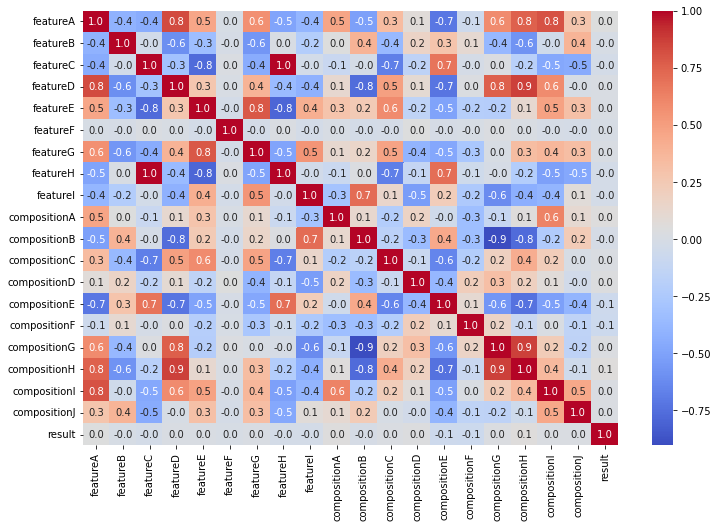

In [16]:
cor=data.corr()
font={"size":1220,"family":"normal"}

plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm',fmt=".1f")
plt.show()

Присутствует корреляция между переменными, но неясно как именно влияет связь на итоговый результат, поэтому решено пока оставить все как есть

In [59]:

features_num = ['featureA', 'featureB', 'featureC', 'featureD', 'featureE',
                'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
                'compositionB', 'compositionC', 'compositionD', 'compositionE',
                'compositionF', 'compositionG', 'compositionH', 'compositionI',
                'compositionJ']

features_cat = ['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
                'categoryF',  'unit']

target = 'result'

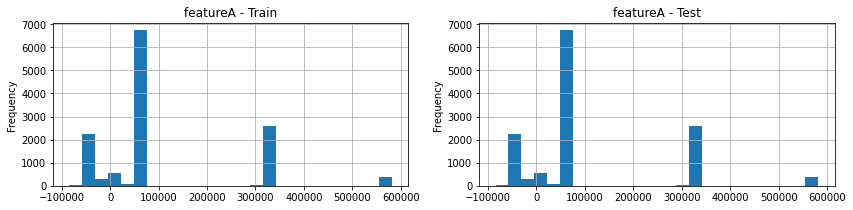

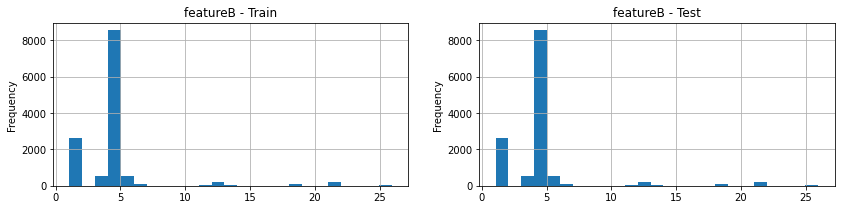

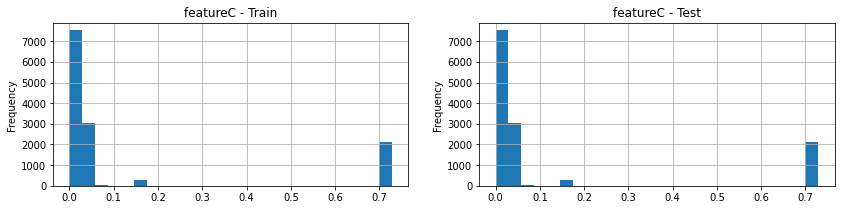

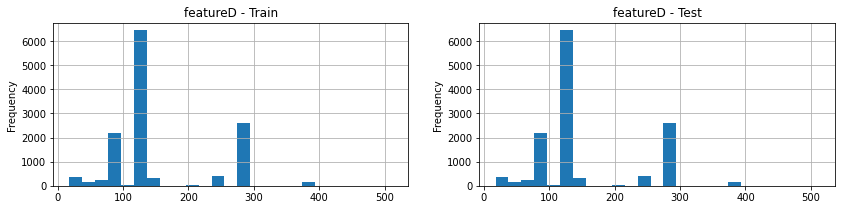

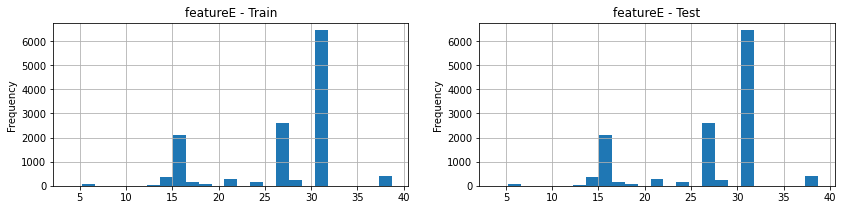

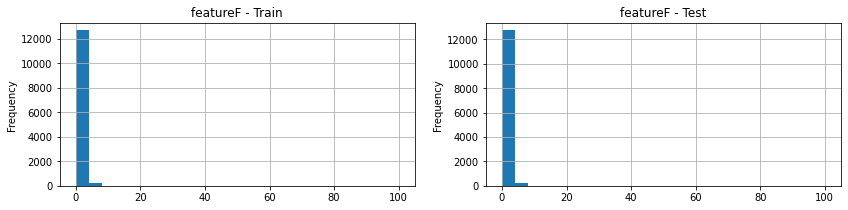

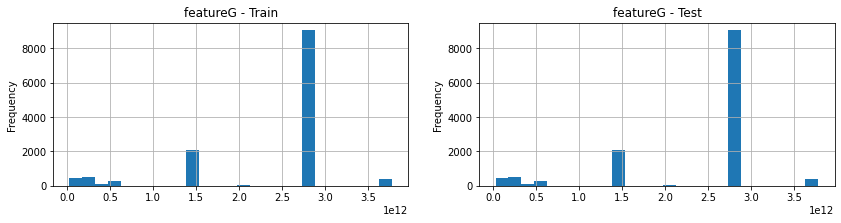

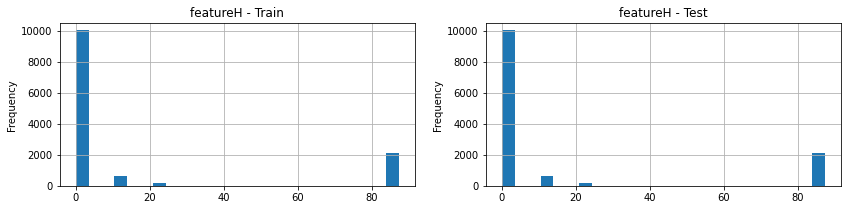

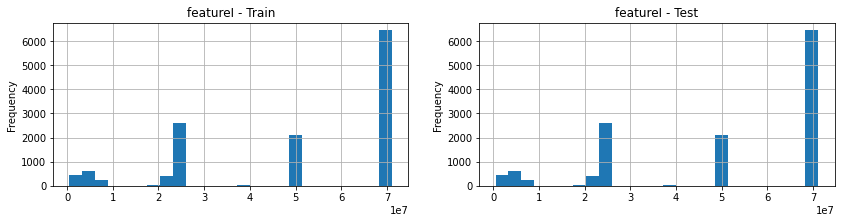

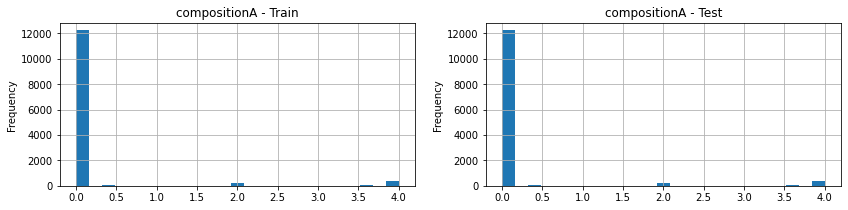

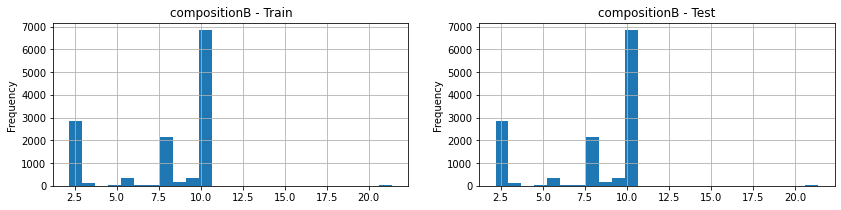

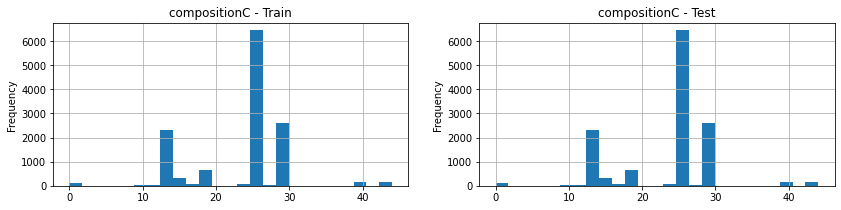

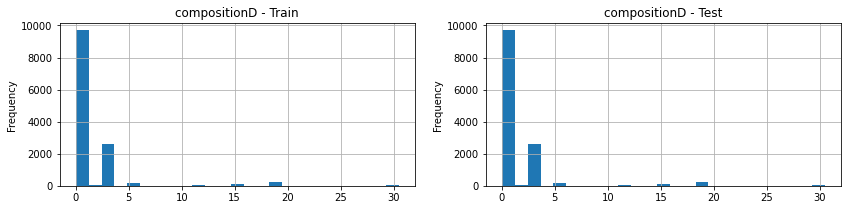

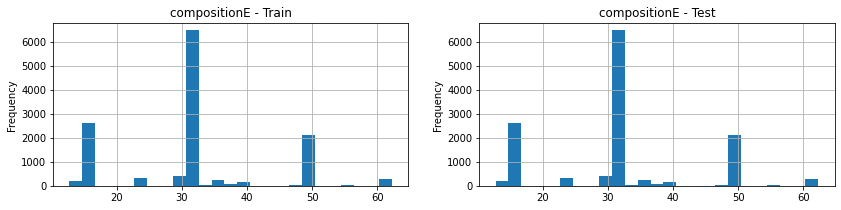

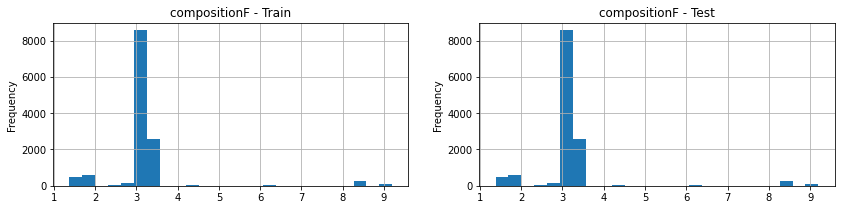

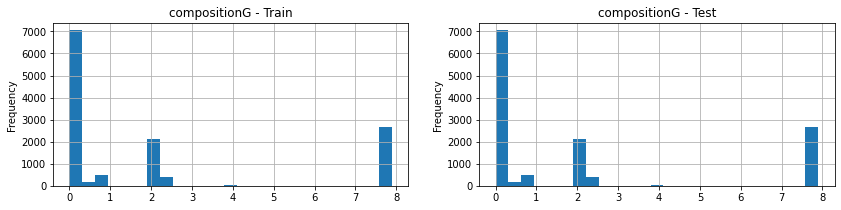

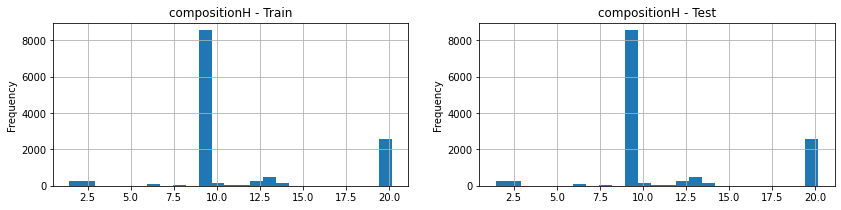

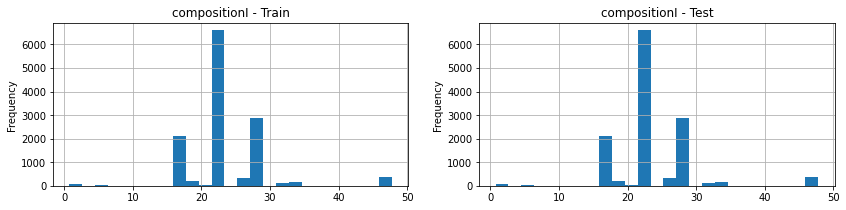

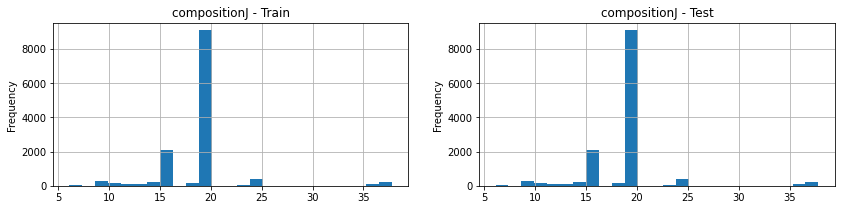

In [26]:

for f in features_num:
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(1,2,1)
    data[f].plot(kind='hist', bins=25)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test[f].plot(kind='hist', bins=25)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

Распредление признаков не похоже на нормальное и определяет наболее повторящиеся признаки 

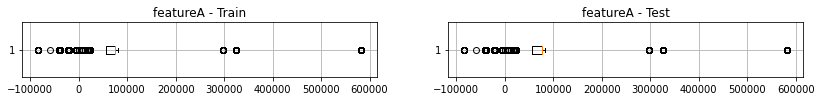

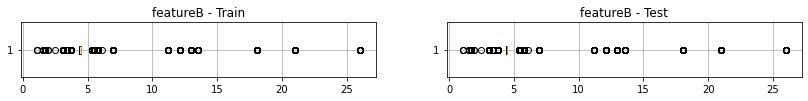

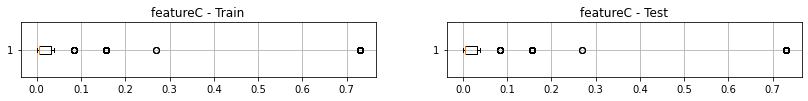

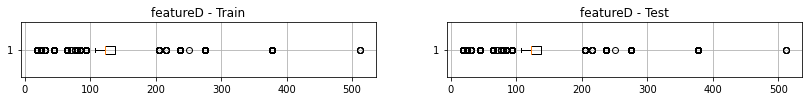

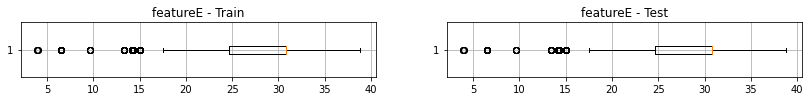

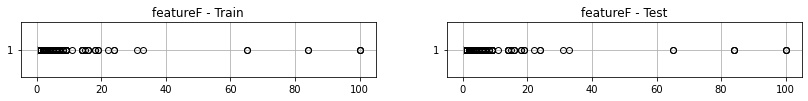

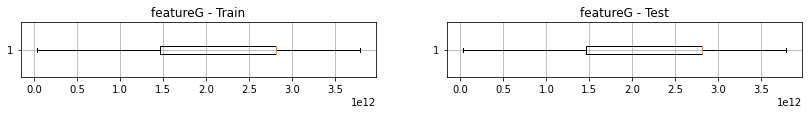

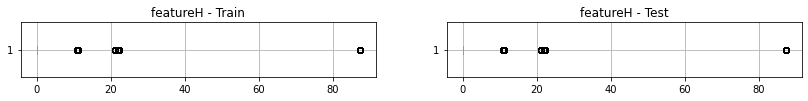

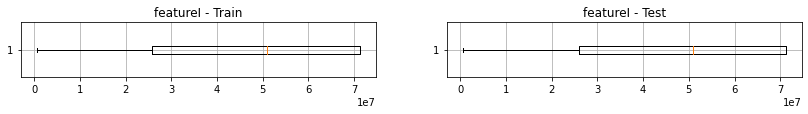

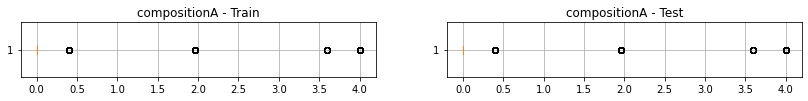

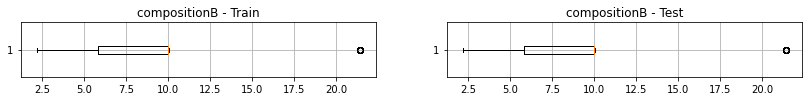

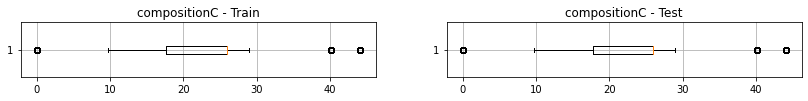

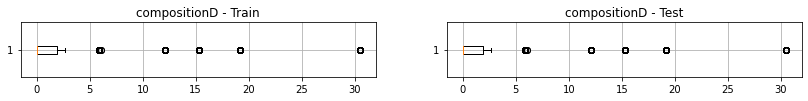

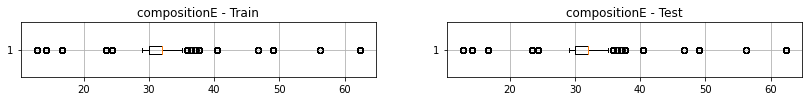

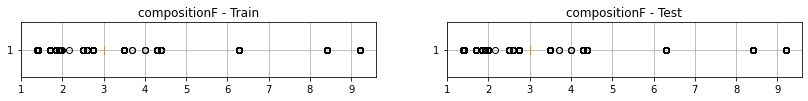

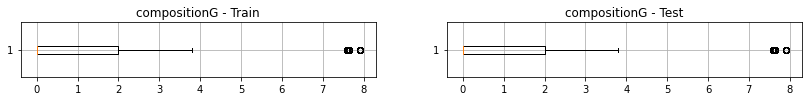

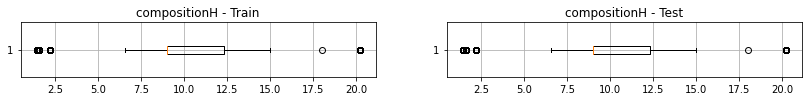

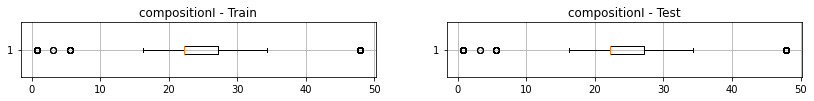

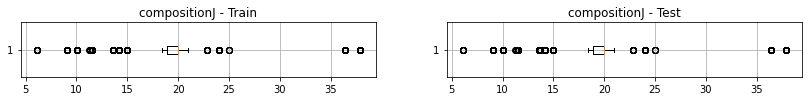

In [32]:
# boxplots (train and test)
for f in features_num:
    plt.figure(figsize=(14,1))
    ax1 = plt.subplot(1,2,1)
    data_temp = data[f].dropna() # boxplot does not like missings...
    plt.boxplot(data_temp, vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test_temp = test[f].dropna()
    plt.boxplot(test_temp, vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

In [33]:
data.columns

Index(['id', 'categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit', 'result'],
      dtype='object')

Построение модели

In [35]:
data[features_cat]

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,unit_6
1,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,unit_6
2,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,unit_4
3,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,unit_5
4,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,unit_15
...,...,...,...,...,...,...,...
12995,catA_3,catB_0,catC_639,catD_0,catE_0,catF_0,unit_1
12996,catA_8,catB_0,catC_445,catD_0,catE_0,catF_0,unit_9
12997,catA_25,catB_0,catC_445,catD_0,catE_0,catF_1,unit_12
12998,catA_7,catB_0,catC_2322,catD_0,catE_5,catF_0,unit_8


In [60]:
train_scaled = data.copy()
test_scaled = test.copy()

In [61]:
scaler = StandardScaler()
train_scaled[features_num] = scaler.fit_transform(data[features_num])
test_scaled[features_num] = scaler.transform(test[features_num])
train_scaled[features_num]

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ
0,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
1,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
2,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
3,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,0.748681,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
4,-1.069068,-0.051243,2.257233,-0.754606,-1.710079,1.588735,-0.974444,2.253553,0.030660,-0.221909,0.090935,-1.496523,-0.34825,1.528407,-0.162668,-0.008201,-0.455706,-1.102459,-0.962522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
12996,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
12997,-0.278170,-0.021516,-0.481773,-0.373437,0.657987,-0.091372,0.526658,-0.470237,0.869483,-0.221909,0.714267,0.368783,-0.34825,-0.003435,-0.162668,-0.682772,-0.455706,-0.189650,0.258149
12998,-0.666448,5.181629,-0.501954,-1.760437,-1.840710,-0.091372,-2.330405,-0.470237,-1.992114,-0.221909,0.477401,-1.631758,-0.34825,0.346185,-1.346055,-0.436554,-2.009226,0.797262,4.611063


In [67]:
set_categoryC = set()

In [77]:
labelencoder = LabelEncoder()
labelencoder.fit(list(set_categoryC))

LabelEncoder()

In [70]:
set_categoryC.update(train_scaled['categoryC'].unique())
set_categoryC.update(test_scaled['categoryC'].unique())

In [79]:
for column in features_cat:

  labelencoder = LabelEncoder()
  if column == "categoryC":
    set_categoryC = set()
    set_categoryC.update(train_scaled[column].unique())
    set_categoryC.update(test_scaled[column].unique())
    labelencoder.fit(list(set_categoryC))
    train_scaled[column] = labelencoder.transform(train_scaled[column])
  else:
    train_scaled[column] = labelencoder.fit_transform(train_scaled[column])
  test_scaled[column] = labelencoder.transform(test_scaled[column])

train_scaled[features_cat]

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,1,0,1925,0,0,0,15
1,1,0,287,0,0,0,15
2,49,0,287,0,0,0,13
3,0,0,2146,0,0,0,14
4,82,0,302,0,11,0,7
...,...,...,...,...,...,...,...
12995,90,0,1840,0,0,0,1
12996,145,0,1639,0,0,0,18
12997,85,0,1639,0,0,1,4
12998,134,0,1080,0,20,0,17


In [87]:
train_scaled = train_scaled.drop('id',1)

<ipython-input-87-c6a6168265d4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_scaled = train_scaled.drop('id',1)


In [90]:
test_scaled = test_scaled.drop('id',1)

<ipython-input-90-b360d5d30b9a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_scaled = test_scaled.drop('id',1)


In [98]:
train_scaled = train_scaled.dropna()
test_scaled = test_scaled.dropna()

In [100]:
train_scaled.isna().any()

categoryA       False
categoryB       False
categoryC       False
categoryD       False
categoryE       False
categoryF       False
featureA        False
featureB        False
featureC        False
featureD        False
featureE        False
featureF        False
featureG        False
featureH        False
featureI        False
compositionA    False
compositionB    False
compositionC    False
compositionD    False
compositionE    False
compositionF    False
compositionG    False
compositionH    False
compositionI    False
compositionJ    False
unit            False
result          False
dtype: bool

In [131]:
train_scaled.result.mean()

0.14413740216591764

In [133]:
train_scaled.result.median()

0.02795211758466545

In [134]:
test_scaled.result.median()

0.02795211758466545

In [135]:
test_scaled.result.mean()

0.14413740216591764

Построение модели

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

In [101]:
X = train_scaled.drop('result',axis=1)
y = train_scaled.result

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [116]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

0.22995089038457728

In [117]:
clf.score(X_test,y_test)

0.22995089038457728

Малое значение lasso - не отслеживается прямая зависимость между переменными 

Для оценки моделей используется коэффициент детерминации, т. к. результат для оценки моделей легче интерпритировать 

In [103]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
y_pred = regr.predict(X_test)

In [106]:
r2_score(y_test,y_pred)

0.8495410081433951

In [111]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [121]:
model = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

In [122]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8543584345123609
0.8571259919677024


In [123]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8571259919677024

Визуализация результата

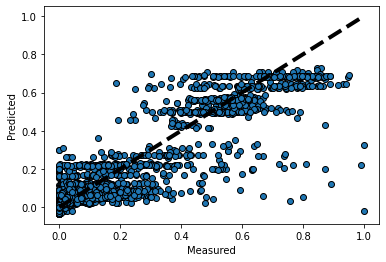

In [127]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()